Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name:

In [183]:
NAME = "Alexey Adamsky"

## Assignment 1 - Data Cleaning & Exploration
**(30 points total)**

For this assignment, we will use an open dataset with data on various types of cereal and the corresponding customer ratings. Use the .csv file provided.

Create a dataframe by importing the file into Jupyter, and complete the tasks below. Be sure to show your Python code. You will not be graded on code efficiency, but your code should return a correct answer.

**Question 1.**  _(4 points)_
* Create a new 'Type of Cereal' column in your dataframe (1 point) by copying the 'name' column. Write a function to replace the names of the cereal in your new column with one of these categories Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other (3 points). Hint: the function should look through the text in the cereal name and determine, based on its contents, how to categorize the cereal type.

**Question 2.**  _(2 points)_
* Identify the negative values in the data set and replace them with the median value for that column.

**Question 3.** _(5 points)_
* Standardize the 'weight' column to 1. For this question, you will need to write a function to divide the remaining columns which contain nutritional information by the corresponding value in the weight column, and you will need to divide the value in the weight column by itself in order to get 1. For example, if an observation has a weight value of 1.33 and a calories value of 250, if you divide 250/1.33 you should get a calories value of 188 and a weight value of 1.

**Question 4.**  _(5 points)_
* Create a new column to categorize cereals as 'healthy' vs. 'unhealthy'. You can define your own version of healthy vs. unhealthy, or you can use the following: healthy cereals can be defined as those which have low calories (<100), low sodium (<150), low sugar (<9) high fiber (>3), and high protein (>2). All other cereals are unhealthy.

**Question 5.** _(2 points)_
* Based on your newly prepared data set, identify what % of cereals that each manufacturer produces are healthy.

**Question 6.** _(2 points)_
* Calculate the average, minimum and maximum ratings for healthy vs. unhealthy cereals.

**Question 7.** _(2 points)_
* Calculate the average, minimum and maximum ratings for each type of cereal: Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other.

**Question 8.** _(3 points)_
* Create a stacked bar chart which shows how many of each type of cereal each manufacturer produces.

**Question 9.** _(3 points)_
* Create a 3-dimensional scatterplot which shows the relationship between rating and calories; the 3-rd dimension should be reflected in the color of the dots and should highlight whether the cereal is categorized as healthy or unhealthy.

**Question 10.** _(1 point)_
* Which shelf has the most healthy cereals?

**Question 11.** _(1 point)_
* Based on the analysis conducted, what can you conclude about the cereal data set?

In [184]:
import pandas as pd

In [185]:
df = pd.read_csv('cereal.csv')

In [186]:
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


### **Question 1.**  _(4 points)_
* Create a new 'Type of Cereal' column in your dataframe (1 point) by copying the 'name' column. Write a function to replace the names of the cereal in your new column with one of these categories Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other (3 points). Hint: the function should look through the text in the cereal name and determine, based on its contents, how to categorize the cereal type.

In [187]:
# make sure `name` doesn't have any missing values
# we also see there are no missing values in any of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [188]:
# review all names
df["name"].unique()

array(['100% Bran', '100% Natural Bran', 'All-Bran',
       'All-Bran with Extra Fiber', 'Almond Delight',
       'Apple Cinnamon Cheerios', 'Apple Jacks', 'Basic 4', 'Bran Chex',
       'Bran Flakes', "Cap'n'Crunch", 'Cheerios', 'Cinnamon Toast Crunch',
       'Clusters', 'Cocoa Puffs', 'Corn Chex', 'Corn Flakes', 'Corn Pops',
       'Count Chocula', "Cracklin' Oat Bran", 'Cream of Wheat (Quick)',
       'Crispix', 'Crispy Wheat & Raisins', 'Double Chex', 'Froot Loops',
       'Frosted Flakes', 'Frosted Mini-Wheats',
       'Fruit & Fibre Dates; Walnuts; and Oats', 'Fruitful Bran',
       'Fruity Pebbles', 'Golden Crisp', 'Golden Grahams',
       'Grape Nuts Flakes', 'Grape-Nuts', 'Great Grains Pecan',
       'Honey Graham Ohs', 'Honey Nut Cheerios', 'Honey-comb',
       'Just Right Crunchy  Nuggets', 'Just Right Fruit & Nut', 'Kix',
       'Life', 'Lucky Charms', 'Maypo',
       'Muesli Raisins; Dates; & Almonds',
       'Muesli Raisins; Peaches; & Pecans', 'Mueslix Crispy Blend',
  

In [189]:
# Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other
def nameToCategory(n):
    if "Bran" in n:
        return "Bran"
    if "Wheat" in n:
        return "Wheat"
    if "Fiber" in n:
        return "Fiber"
    if "Protein" in n:
        return "Protein"
    if "Crunch" in n:
        return "Crunch"
    if "Corn" in n:
        return "Corn"
    if "Nut" in n or "Almond" in n or "Walnut" in n or "Pecan" in n:
        return "Nut"
    if "Rice" in n:
        return "Rice"
    else:
        return "Other"

In [190]:
df["Type of Cereal"] = df["name"].apply(nameToCategory)

In [191]:
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Bran
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Bran
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Bran
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Bran
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Nut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,Other
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,Other
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,Wheat
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193,Wheat


In [192]:
# resulting categories
df["Type of Cereal"].unique()

array(['Bran', 'Nut', 'Other', 'Crunch', 'Corn', 'Wheat', 'Rice'],
      dtype=object)

### **Question 2.**  _(2 points)_
* Identify the negative values in the data set and replace them with the median value for that column.

In [193]:
# these 3 columns have negative values "carbo, sugars and potass"
df.describe(include='all')

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal
count,77,77,77,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77
unique,77,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,100% Bran,K,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
freq,1,23,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
mean,NaN,NaN,NaN,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705,NaN
std,NaN,NaN,NaN,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289,NaN
min,NaN,NaN,NaN,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851,NaN
25%,NaN,NaN,NaN,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094,NaN
50%,NaN,NaN,NaN,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208,NaN
75%,NaN,NaN,NaN,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392,NaN


In [194]:
df["carbo"].describe()

count    77.000000
mean     14.597403
std       4.278956
min      -1.000000
25%      12.000000
50%      14.000000
75%      17.000000
max      23.000000
Name: carbo, dtype: float64

In [195]:
df.loc[df["carbo"] < 0, "carbo"] = df["carbo"].median()

In [196]:
df["carbo"].describe()

count    77.000000
mean     14.792208
std       3.882612
min       5.000000
25%      12.000000
50%      14.000000
75%      17.000000
max      23.000000
Name: carbo, dtype: float64

In [197]:
df.loc[df["sugars"] < 0, "sugars"] = df["sugars"].median()

In [198]:
df.loc[df["potass"] < 0, "potass"] = df["potass"].median()

In [199]:
df.describe(include='all')

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal
count,77,77,77,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77
unique,77,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,100% Bran,K,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
freq,1,23,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
mean,NaN,NaN,NaN,106.883117,2.545455,1.012987,159.675325,2.151948,14.792208,7.025974,98.441558,28.246753,2.207792,1.029610,0.821039,42.665705,NaN
std,NaN,NaN,NaN,19.484119,1.094790,1.006473,83.832295,2.383364,3.882612,4.349755,69.491857,22.342523,0.832524,0.150477,0.232716,14.047289,NaN
min,NaN,NaN,NaN,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851,NaN
25%,NaN,NaN,NaN,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,45.000000,25.000000,1.000000,1.000000,0.670000,33.174094,NaN
50%,NaN,NaN,NaN,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208,NaN
75%,NaN,NaN,NaN,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392,NaN


In [200]:
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Bran
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Bran
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Bran
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Bran
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,90,25,3,1.0,0.75,34.384843,Nut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,Other
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,Other
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,Wheat
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193,Wheat


### **Question 3.** _(5 points)_
* Standardize the 'weight' column to 1. For this question, you will need to write a function to divide the remaining columns which contain nutritional information by the corresponding value in the weight column, and you will need to divide the value in the weight column by itself in order to get 1. For example, if an observation has a weight value of 1.33 and a calories value of 250, if you divide 250/1.33 you should get a calories value of 188 and a weight value of 1.

In [201]:
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Bran
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Bran
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Bran
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Bran
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,90,25,3,1.0,0.75,34.384843,Nut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,Other
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,Other
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,Wheat
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193,Wheat


In [202]:
df.loc[df["weight"] != 1, "weight"]

7     1.33
27    1.25
28    1.33
39    1.30
46    1.50
49    1.33
51    1.25
52    1.33
54    0.50
55    0.50
58    1.33
63    0.83
70    1.50
Name: weight, dtype: float64

In [203]:
# index 7 has weight of 1.33 and 130 calories
df[["calories", "weight"]].loc[7]

calories    130.00
weight        1.33
Name: 7, dtype: float64

In [204]:
(df["calories"] / df["weight"]).loc[7]

97.74436090225564

In [205]:
# caclulate calories where weight is not equal to 1
df.loc[df["weight"] != 1, "calories"] = df["calories"] / df["weight"]

In [206]:
# override weight to be 1 for all entries
df["weight"] = 1

In [207]:
# index 7 now has weight of 1 and correct calories.
df[["calories", "weight"]].loc[7]

calories    97.744361
weight       1.000000
Name: 7, dtype: float64

### **Question 4.**  _(5 points)_
* Create a new column to categorize cereals as 'healthy' vs. 'unhealthy'. You can define your own version of healthy vs. unhealthy, or you can use the following: healthy cereals can be defined as those which have low calories (<100), low sodium (<150), low sugar (<9) high fiber (>3), and high protein (>2). All other cereals are unhealthy.

In [208]:
# low calories (<100), low sodium (<150), low sugar (<9) high fiber (>3), and high protein (>2)
def getHealthyness(calories, sodium, sugars, fiber, protein):
    if calories < 100 and sodium < 150 and sugars < 9 and fiber > 3 and protein > 2:
        return "healthy"
    else:
        return "unhealthy"

df["healthyness"] = df.apply(lambda r: \
    getHealthyness(r["calories"], r["sodium"], r["sugars"], r["fiber"], r["protein"]), axis=1)

In [209]:
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal,healthyness
0,100% Bran,N,C,70.0,4,1,130,10.0,5.0,6,280,25,3,1,0.33,68.402973,Bran,healthy
1,100% Natural Bran,Q,C,120.0,3,5,15,2.0,8.0,8,135,0,3,1,1.00,33.983679,Bran,unhealthy
2,All-Bran,K,C,70.0,4,1,260,9.0,7.0,5,320,25,3,1,0.33,59.425505,Bran,unhealthy
3,All-Bran with Extra Fiber,K,C,50.0,4,0,140,14.0,8.0,0,330,25,3,1,0.50,93.704912,Bran,healthy
4,Almond Delight,R,C,110.0,2,2,200,1.0,14.0,8,90,25,3,1,0.75,34.384843,Nut,unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110.0,2,1,250,0.0,21.0,3,60,25,3,1,0.75,39.106174,Other,unhealthy
73,Trix,G,C,110.0,1,1,140,0.0,13.0,12,25,25,2,1,1.00,27.753301,Other,unhealthy
74,Wheat Chex,R,C,100.0,3,1,230,3.0,17.0,3,115,25,1,1,0.67,49.787445,Wheat,unhealthy
75,Wheaties,G,C,100.0,3,1,200,3.0,17.0,3,110,25,1,1,1.00,51.592193,Wheat,unhealthy


### **Question 5.** _(2 points)_
* Based on your newly prepared data set, identify what % of cereals that each manufacturer produces are healthy.

In [210]:
df['mfr'].unique()

array(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], dtype=object)

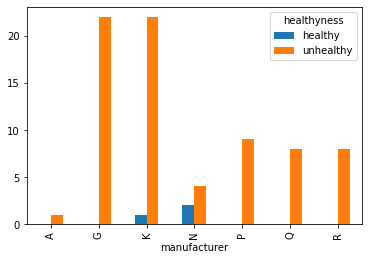

In [211]:
df[["mfr", "healthyness"]]\
    .rename(columns={"mfr": "manufacturer"})\
        .groupby(["manufacturer", "healthyness"])\
            .size().unstack()\
                .plot(kind="bar");

### **Question 6.** _(2 points)_
* Calculate the average, minimum and maximum ratings for healthy vs. unhealthy cereals.

In [212]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal,healthyness
0,100% Bran,N,C,70.0,4,1,130,10.0,5.0,6,280,25,3,1,0.33,68.402973,Bran,healthy
1,100% Natural Bran,Q,C,120.0,3,5,15,2.0,8.0,8,135,0,3,1,1.00,33.983679,Bran,unhealthy
2,All-Bran,K,C,70.0,4,1,260,9.0,7.0,5,320,25,3,1,0.33,59.425505,Bran,unhealthy
3,All-Bran with Extra Fiber,K,C,50.0,4,0,140,14.0,8.0,0,330,25,3,1,0.50,93.704912,Bran,healthy
4,Almond Delight,R,C,110.0,2,2,200,1.0,14.0,8,90,25,3,1,0.75,34.384843,Nut,unhealthy


<AxesSubplot:xlabel='healthyness'>

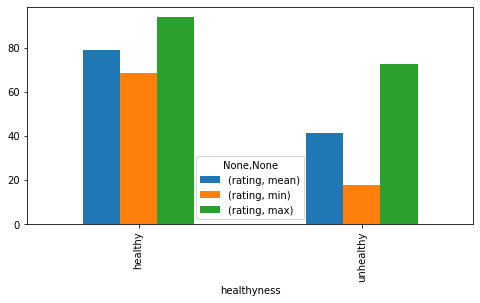

In [213]:
df.groupby("healthyness").aggregate({ "rating": ["mean", "min", "max"] })\
    .plot(kind="bar", figsize=(8,4))

### **Question 7.** _(2 points)_
* Calculate the average, minimum and maximum ratings for each type of cereal: Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other.

In [214]:
df["Type of Cereal"].unique()

array(['Bran', 'Nut', 'Other', 'Crunch', 'Corn', 'Wheat', 'Rice'],
      dtype=object)

<AxesSubplot:xlabel='Type of Cereal'>

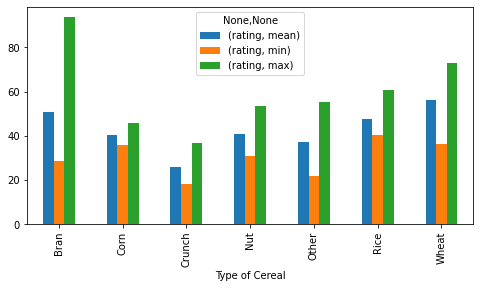

In [215]:
df.groupby("Type of Cereal").aggregate({ "rating": ["mean", "min", "max"] })\
    .plot(kind="bar", figsize=(8,4))

### **Question 8.** _(3 points)_
* Create a stacked bar chart which shows how many of each type of cereal each manufacturer produces.

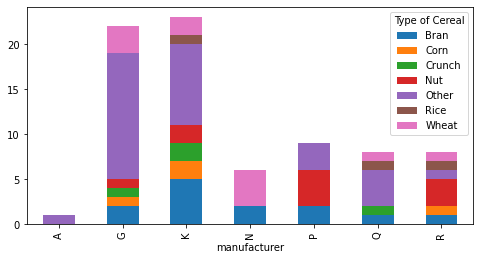

In [216]:
df.rename(columns={"mfr": "manufacturer"})\
    .groupby(["manufacturer", "Type of Cereal"])\
        .size().unstack()\
            .plot(kind="bar", figsize=(8,4), stacked=True);

### **Question 9.** _(3 points)_
* Create a 3-dimensional scatterplot which shows the relationship between rating and calories; the 3-rd dimension should be reflected in the color of the dots and should highlight whether the cereal is categorized as healthy or unhealthy.

In [217]:
import seaborn as sns

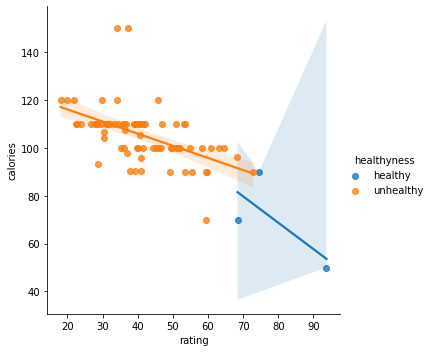

In [218]:
# rating seem to increase as calories drop, for both healthy and unhealthy categories
sns.lmplot(x="rating", y="calories", hue="healthyness", data=df, fit_reg=True);

### **Question 10.** _(1 point)_
* Which shelf has the most healthy cereals?

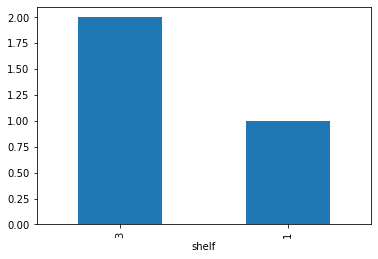

In [219]:
# shelf #3 has most of the healthy cerials
df[df["healthyness"] == "healthy"].groupby("shelf")\
    .size().sort_values(ascending=False).plot(kind="bar");

### **Question 11.** _(1 point)_
* Based on the analysis conducted, what can you conclude about the cereal data set?

In [220]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.0,77.000000,77.000000
mean,103.996910,2.545455,1.012987,159.675325,2.151948,14.792208,7.025974,98.441558,28.246753,2.207792,1.0,0.821039,42.665705
std,13.851864,1.094790,1.006473,83.832295,2.383364,3.882612,4.349755,69.491857,22.342523,0.832524,0.0,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,1.0,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,45.000000,25.000000,1.000000,1.0,0.670000,33.174094
50%,106.666667,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.0,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.0,1.000000,50.828392
max,150.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.0,1.500000,93.704912


Overview:
- The data set is decent as is mostly have all the necessary data for analysis, except a few missing data points represented by a `-1`
- Unfortunately there is no type category and we have infer it from the name, which may be quite inaccurate.
- Finally the data set is fairly small, only 77 entries; however, despite a small size we seem to be able to identify a strong correlation between calories and rating.

In [221]:
df[df["healthyness"]=="healthy"]["healthyness"].describe()

count           3
unique          1
top       healthy
freq            3
Name: healthyness, dtype: object

Conclusions:
- The wast majority of cereals are unhealthy
- People looking for healthier options would likely not find then on the 2nd shelf
- People seem to give higher rating lower calories with lower calories count